In [1]:
%matplotlib inline
import pylab as plt
import pandas

# Generate initial data

In [4]:
import numpy as np

N = 5000

Train = pandas.read_csv("./train.csv")
Test = pandas.read_csv("./test.csv")

Col = list(Train.columns.values)
Col.remove("Unnamed: 0")
Col.remove("TARGET")

In [5]:
N = len(Train["TARGET"])
X_train = np.array([np.ones(N)] + [Train[icol] for icol in Col]).T #[::,tokeep]
print(X_train.shape)
y_train = Train["TARGET"]
N = len(Test["TARGET"])
X_test = np.array([np.ones(N)] + [Test[icol] for icol in Col]).T #[::,tokeep]
print( X_test.shape)
y_test = Test["TARGET"]

print(np.sum(np.isnan(X_train)))
#print( X_train.mean(axis=0))
print(y_train.shape)

(263404, 52)
(65852, 52)
0
(263404,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

## Create the model

In [8]:
F = RandomForestClassifier(n_estimators=50,max_depth=15)
F.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Estimate the maximum a posteriori

[ -3.67397487e-02  -1.34698143e-01   2.99184832e-02  -3.42938831e-02
   1.53325394e-01  -5.92893329e-02  -8.51906207e-02   1.48765086e-01
  -2.64556581e-02  -6.64453892e-02  -1.69224398e-01  -8.71304321e-02
  -8.28503256e-02   4.53429139e-02  -1.08502880e-02  -1.23120040e-02
  -6.93604922e-02   2.51366482e-01   1.59386264e-02  -1.04691930e-02
  -2.88680995e-05   4.48785343e-02]


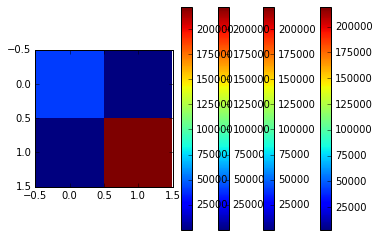

In [13]:
from sklearn.metrics import confusion_matrix
cf_train = []
cf_test = []
for depth in range(10,50,10):
    F = RandomForestClassifier(n_estimators=50,max_depth=depth)
    F.fit(X_train,y_train)
    res = F.predict(X_train)
  
    cf = confusion_matrix(y_train,res)
    plt.imshow(cf,interpolation="None")
    plt.colorbar()
    cf_train.append(cf / len(y_train))

    cf_test.append(confusion_matrix(y_test, F.predict(X_test))/len(y_test))

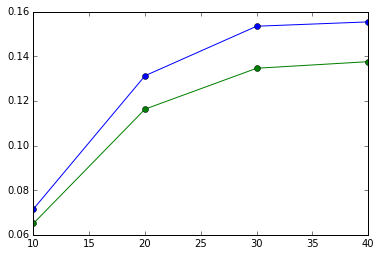

In [15]:
D = range(10,50,10)

plt.plot(D, [ cf_train[i][0,0] for i in range(len(D))],"-o")
plt.plot(D, [ cf_test[i][0,0] for i in range(len(D))],"-o")


## Show the trace and the distribution of the samples

In [15]:
from pymc3 import traceplot,summary


In [ ]:
tokeep = [i + 30 for i,v in enumerate(trace["beta"].mean(axis=0)) if v >0.05 or v < -0.05]
loaded_trace = np.loadtxt("./trace_30.pick")
print(loaded_trace)
tokeep = [i  for i,v in enumerate(loaded_trace) if v >0.05 or v < -0.05] + tokeep
print(tokeep)


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.037           0.004            0.000            [-0.045, -0.029]
  -0.135           0.003            0.000            [-0.142, -0.130]
  0.030            0.109            0.011            [-0.156, 0.161]
  -0.034           0.002            0.000            [-0.038, -0.031]
  0.153            0.006            0.001            [0.143, 0.164]
  -0.059           0.006            0.001            [-0.070, -0.048]
  -0.085           0.003            0.000            [-0.090, -0.079]
  0.149            0.005            0.000            [0.139, 0.156]
  -0.026           0.003            0.000            [-0.033, -0.022]
  -0.066           0.004            0.000            [-0.073, -0.059]
  -0.169           0.005            0.000            [-0.178, -0.159]
  -0.087           0.007            0.001            [-0.104, -0.077]
  -0.083      

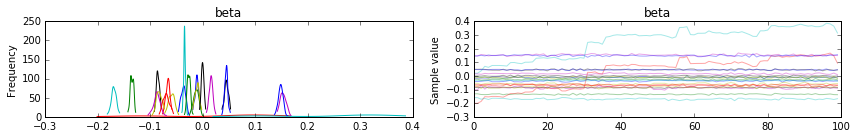

In [17]:
#print("Groud truth",betas_v)
traceplot(trace);
summary(trace)

## Comparison cdf vs sigmoid

In [ ]:
x = np.arange(-10,10,0.01)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
plt.title("Comparison")
plt.plot(x,norm.cdf(x),label="cdf")
plt.plot(x,1/(1+np.exp(-1.75*x)),label="sigmoid")
plt.legend(loc="best")
ax = f.add_subplot(122)
plt.title("Difference")
plt.plot(x,norm.cdf(x)-1/(1+np.exp(-1.75*x)),label="difference")
plt.legend()
